<b> T5 Data Science Bootcamp</b>


## Goodreads books 

by:Batoul Alosaimi ,Norah Alqahtani and Shroaq Almutairi

### Table of Contents:


<li><a id='Introduction'> Introduction</a></li>
<li><a id='1. Gather data'> 1.Gather data</a></li>
<li><a id=' 2.Preparing the Data'>2. Preparing the Data </a></li>
<li><a id='3.Exploratory Data Analysis'>3.Exploratory Data Analysis </a></li>
<li><a id='4. Building the Model'>4. Building the Model</a></li>

### Introduction

>This is the second project for the T5 Data Science Bootcamp, which is about building a linear regression model that address a useful prediction using Scikit-learn, and using data scraped from website with Requests, BeautifulSoup, and Selenium. This project helps ReadMe firm which is an online web site that is selling books. In order to determine the price of its products they ask for our help as data scientists to study the books features to predict a suitable price.

### Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
from bs4 import BeautifulSoup as bs
import requests
import matplotlib
from sklearn.metrics import r2_score
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, scale
import time, os
import re

### 1.Gather data

>1.Kaggle Goodreads-books Dataset:<a id='https://www.kaggle.com/jealousleopard/goodreadsbooks'> https://www.kaggle.com/jealousleopard/goodreadsbooks</a>

>2.web scraping to find book price from BookFinder 


Note: can be found steps one and two in a file Books_price_scraping.ipynb

####  1.3 Load data from 

In [2]:
new_book_df = pd.read_csv("new_book.csv", error_bad_lines=False, index_col=0)
new_book_df.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Price
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,SAR 44.8875
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,SAR 44.8875
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,11/1/2003,Scholastic,Not found
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,SAR 228.225
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic,SAR 295.552325581395


###### Information data frame

In [3]:
new_book_df.shape

(1352, 12)

In [4]:
new_book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 1 to 4696
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1352 non-null   object 
 1   authors             1352 non-null   object 
 2   average_rating      1352 non-null   float64
 3   isbn                1352 non-null   object 
 4   isbn13              1352 non-null   float64
 5   language_code       1352 non-null   object 
 6     num_pages         1352 non-null   int64  
 7   ratings_count       1352 non-null   int64  
 8   text_reviews_count  1352 non-null   int64  
 9   publication_date    1352 non-null   object 
 10  publisher           1352 non-null   object 
 11  Price               1352 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 137.3+ KB


### 2. Preparing the Data

###### 2.1 find and drop unll values

In [5]:
new_book_df.isnull().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
Price                 0
dtype: int64

###### 2.2 find duplicated

In [6]:
new_book_df['isbn'].duplicated().sum() 

0

###### 2.3 columns name

In [7]:
new_book_df.columns = [column.strip() for column in new_book_df.columns]
new_book_df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher', 'Price'],
      dtype='object')

##### 2.4 Clean Price column

###### convert Price column to flaot instead of object and git rid of unpriced columns 

In [8]:
#Removing the SAR from the price 
new_book_df['Price'] = new_book_df['Price'].str.replace('SAR','')
new_book_df['Price'] = new_book_df['Price'].str.replace(',','')
new_book_df.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Price
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,44.8875
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,44.8875
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,11/1/2003,Scholastic,Not found
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,228.225
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic,295.552325581395


In [9]:
new_book_df['Price'].replace(['Not found'],'0', inplace=True)
new_book_df

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Price
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,44.8875
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,44.8875
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,11/1/2003,Scholastic,0
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,228.225
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic,295.552325581395
...,...,...,...,...,...,...,...,...,...,...,...,...
4686,Ultimate Punishment,Scott Turow,3.81,031242373X,9.780310e+12,eng,176,506,50,8/1/2004,St. Martins Press-3PL,70.125
4692,The Physician (Cole Family Trilogy #1),Noah Gordon,4.37,751503894,9.780750e+12,eng,720,23114,1175,7/1/2001,Little Brown Book Group,223.46
4693,Matters of Choice (Cole Family Trilogy #3),Noah Gordon/Mirjana Cvekić/Ljiljana Cvekić,3.39,451187261,9.780450e+12,eng,448,2680,142,5/1/1997,Signet,388.50


###### So lets change it to numeric using the pandas to_numeric function

In [10]:
new_book_df['Price'] = pd.to_numeric(new_book_df['Price'])
new_book_df.dtypes

title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
Price                 float64
dtype: object

###### drop unpriced rows

In [11]:
new_book_df = new_book_df[new_book_df.Price != 0]
new_book_df

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Price
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,44.887500
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,44.887500
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,228.225000
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic,295.552326
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,976540606,9.780980e+12,en-US,152,19,1,4/26/2005,Nimble Books,79.612500
...,...,...,...,...,...,...,...,...,...,...,...,...
4685,One L: The Turbulent True Story of a First Yea...,Scott Turow,3.67,446673781,9.780450e+12,eng,288,6093,447,9/1/1997,Warner Books (NY),82.462500
4686,Ultimate Punishment,Scott Turow,3.81,031242373X,9.780310e+12,eng,176,506,50,8/1/2004,St. Martins Press-3PL,70.125000
4692,The Physician (Cole Family Trilogy #1),Noah Gordon,4.37,751503894,9.780750e+12,eng,720,23114,1175,7/1/2001,Little Brown Book Group,223.460000


###### convert isbn column to integer instead of object 

In [12]:
new_book_df['isbn'] = new_book_df['isbn'].str.replace('X','')
new_book_df.head()

<ipython-input-12-ab72d4c95789>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_book_df['isbn'] = new_book_df['isbn'].str.replace('X','')


,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Price
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,44.887500
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,44.887500
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548,9.780440e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,228.225000
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic,295.552326
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,976540606,9.780980e+12,en-US,152,19,1,4/26/2005,Nimble Books,79.612500


In [13]:
new_book_df['isbn'] = pd.to_numeric(new_book_df['isbn'])
new_book_df.dtypes

<ipython-input-13-164bcf5efaee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_book_df['isbn'] = pd.to_numeric(new_book_df['isbn'])


title                  object
authors                object
average_rating        float64
isbn                    int64
isbn13                float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
Price                 float64
dtype: object

In [14]:
#new_book_df["DATE"] = pd.to_datetime(new_book_df.publication_date , format="%m/%d/%Y")
#new_book_df.dtypes

#### Checking for an outlier in the price


In [15]:
new_book_df.describe()

,average_rating,isbn,isbn13,num_pages,ratings_count,text_reviews_count,Price
count,1298.000000,1.298000e+03,1.298000e+03,1298.000000,1.298000e+03,1298.000000,1298.000000
mean,3.928267,7.167723e+08,9.729883e+12,364.410632,3.665539e+04,960.207242,145.970065
std,0.348855,1.095340e+09,6.920103e+11,276.311274,1.903023e+05,3758.798811,166.991941
min,0.000000,1.000390e+05,8.987060e+09,0.000000,0.000000e+00,0.000000,26.175000
25%,3.770000,1.591159e+08,9.780310e+12,200.250000,1.235000e+02,11.000000,70.395625
50%,3.940000,4.522801e+08,9.780520e+12,304.000000,1.010000e+03,69.000000,91.800000
75%,4.110000,7.867098e+08,9.780810e+12,448.000000,6.665750e+03,320.750000,155.057485
max,5.000000,9.774248e+09,9.789770e+12,3342.000000,2.418736e+06,56604.000000,2291.100000


In [16]:
new_book_df.dtypes

title                  object
authors                object
average_rating        float64
isbn                    int64
isbn13                float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
Price                 float64
dtype: object

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

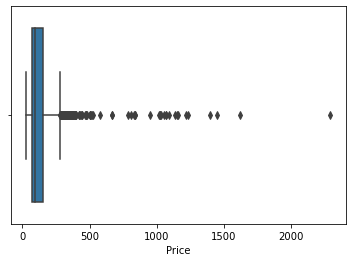

In [17]:
sns.boxplot(new_book_df.Price)

###### we can see that there is a book with a very high price and it differs from the range of prices. we can remove it

In [18]:
new_book_df= new_book_df[(new_book_df['Price']<1000)]
new_book_df.describe()


,average_rating,isbn,isbn13,num_pages,ratings_count,text_reviews_count,Price
count,1281.000000,1.281000e+03,1.281000e+03,1281.000000,1.281000e+03,1281.000000,1281.000000
mean,3.928696,7.136827e+08,9.729205e+12,364.322404,3.696795e+04,965.014052,131.492287
std,0.349710,1.073103e+09,6.965653e+11,275.550483,1.914743e+05,3776.952986,104.677714
min,0.000000,1.000390e+05,8.987060e+09,0.000000,0.000000e+00,0.000000,26.175000
25%,3.770000,1.586634e+08,9.780310e+12,203.000000,1.300000e+02,11.000000,69.825000
50%,3.940000,4.522822e+08,9.780520e+12,304.000000,1.035000e+03,69.000000,89.962500
75%,4.110000,7.868872e+08,9.780810e+12,448.000000,6.736000e+03,329.000000,150.410959
max,5.000000,9.774248e+09,9.789770e+12,3342.000000,2.418736e+06,56604.000000,947.877907


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

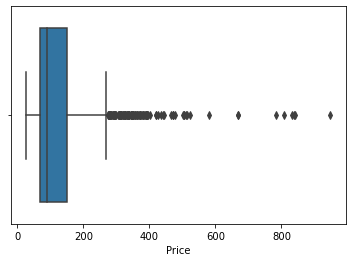

In [19]:
sns.boxplot(new_book_df.Price)

### Converting Categorical Features to Numerical


>in order to Visualize our data 
and disply the correlation between features it will be easer to deel with Numerical data instead of catogeracal So we will convert catogeracal features by LabelEncoder() 

In [20]:
le = LabelEncoder()
language_encoded = le.fit_transform(new_book_df['language_code'])

print(language_encoded)

[4 4 4 ... 4 4 4]


In [21]:
new_book_df=new_book_df.copy()
new_book_df['language_encoded'] = language_encoded
new_book_df.head(1)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Price,language_encoded
bookID,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,44.8875,4


In [22]:
la = LabelEncoder()
publisher_encoded = la.fit_transform(new_book_df['publisher'])

new_book_df['publisher_encoded'] = publisher_encoded
new_book_df.head(1)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Price,language_encoded,publisher_encoded
bookID,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,44.8875,4,394


In [23]:
la = LabelEncoder()
title_encoded = la.fit_transform(new_book_df['title'])

new_book_df['title_encoded'] = title_encoded
new_book_df.head(1)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Price,language_encoded,publisher_encoded,title_encoded
bookID,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,44.8875,4,394,381


In [24]:
la = LabelEncoder()
authors_encoded = la.fit_transform(new_book_df['authors'])

new_book_df['authors_encoded'] = authors_encoded
new_book_df.head(1)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Price,language_encoded,publisher_encoded,title_encoded,authors_encoded
bookID,,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,44.8875,4,394,381,401


### Exploratory Data Analysis

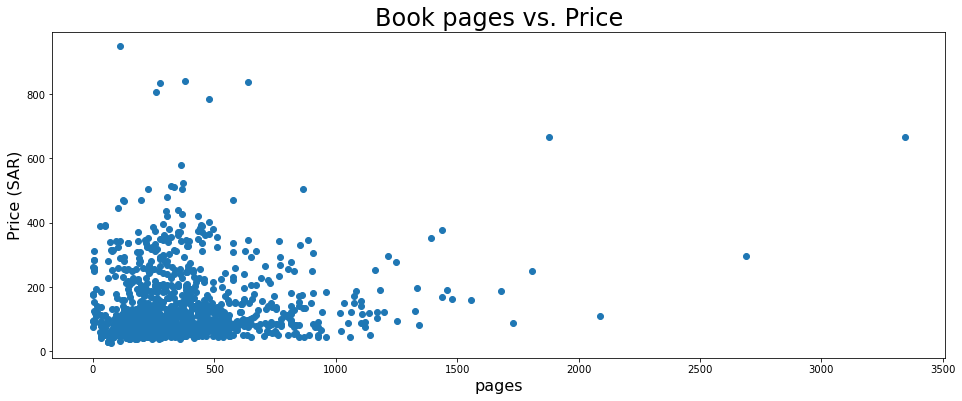

In [25]:
plt.figure(figsize=(16, 6))
plt.xlabel("pages", size=16)
plt.ylabel("Price (SAR)", size=16)
plt.title("Book pages vs. Price", size=24)
plt.scatter(new_book_df['num_pages'],new_book_df['Price']);

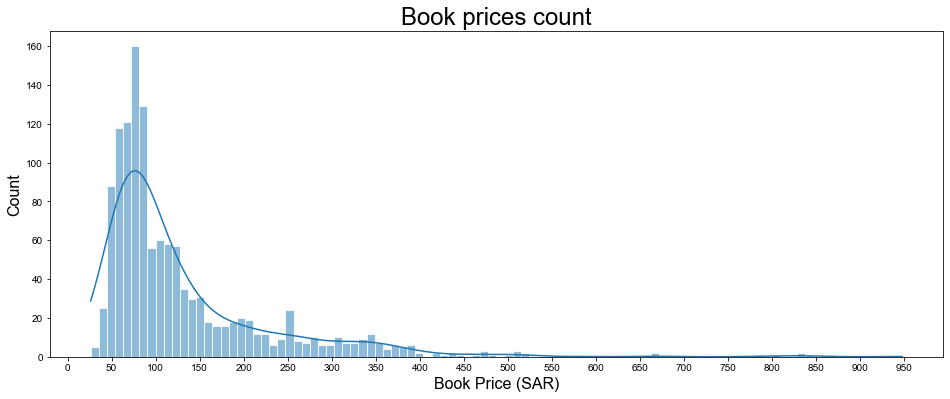

In [26]:

plt.figure(figsize=(16, 6))
plt.xlabel("Book Price (SAR)", size=16)
plt.ylabel("Count", size=16)
plt.title("Book prices count", size=24)
plt.xticks(range(0,1000,50))
sns.set_style("white")
sns.histplot(new_book_df['Price'],bins=100, kde=True);

In [27]:
grouped_df = new_book_df.groupby(["language_code"]).agg({'Price':np.mean}).sort_values(by = 'Price', ascending = False)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


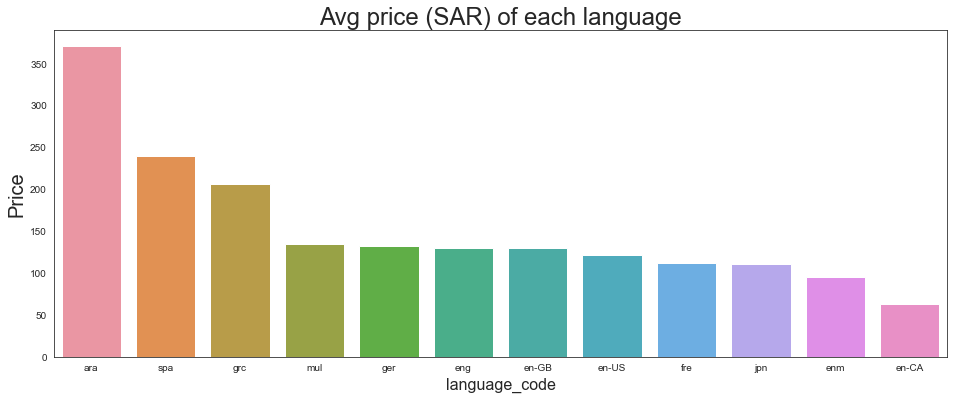

In [28]:
plt.figure(figsize=(16, 6))
plt.xlabel("Price", size=16)
plt.ylabel("language_code", size=20)
plt.title("Avg price (SAR) of each language", size=24)
plt.xticks(rotation=360)
sns.barplot(grouped_df.index,grouped_df['Price']);

#### drop unneeded columns

In [29]:
new_book_df.head(1)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Price,language_encoded,publisher_encoded,title_encoded,authors_encoded
bookID,,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,44.8875,4,394,381,401


#### check correlation between feature

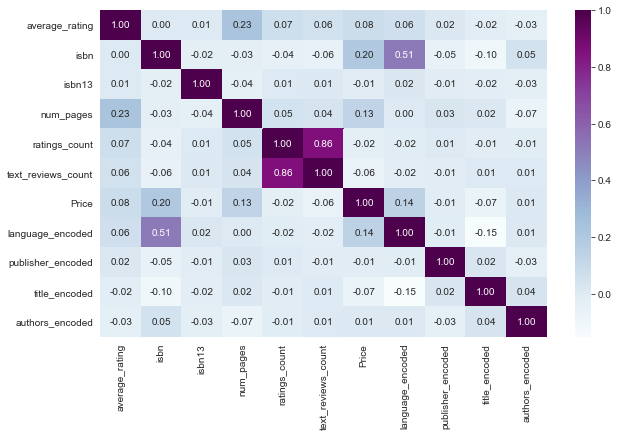

In [30]:
corr =new_book_df.corr()
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.savefig('./Cor')
plt.show()

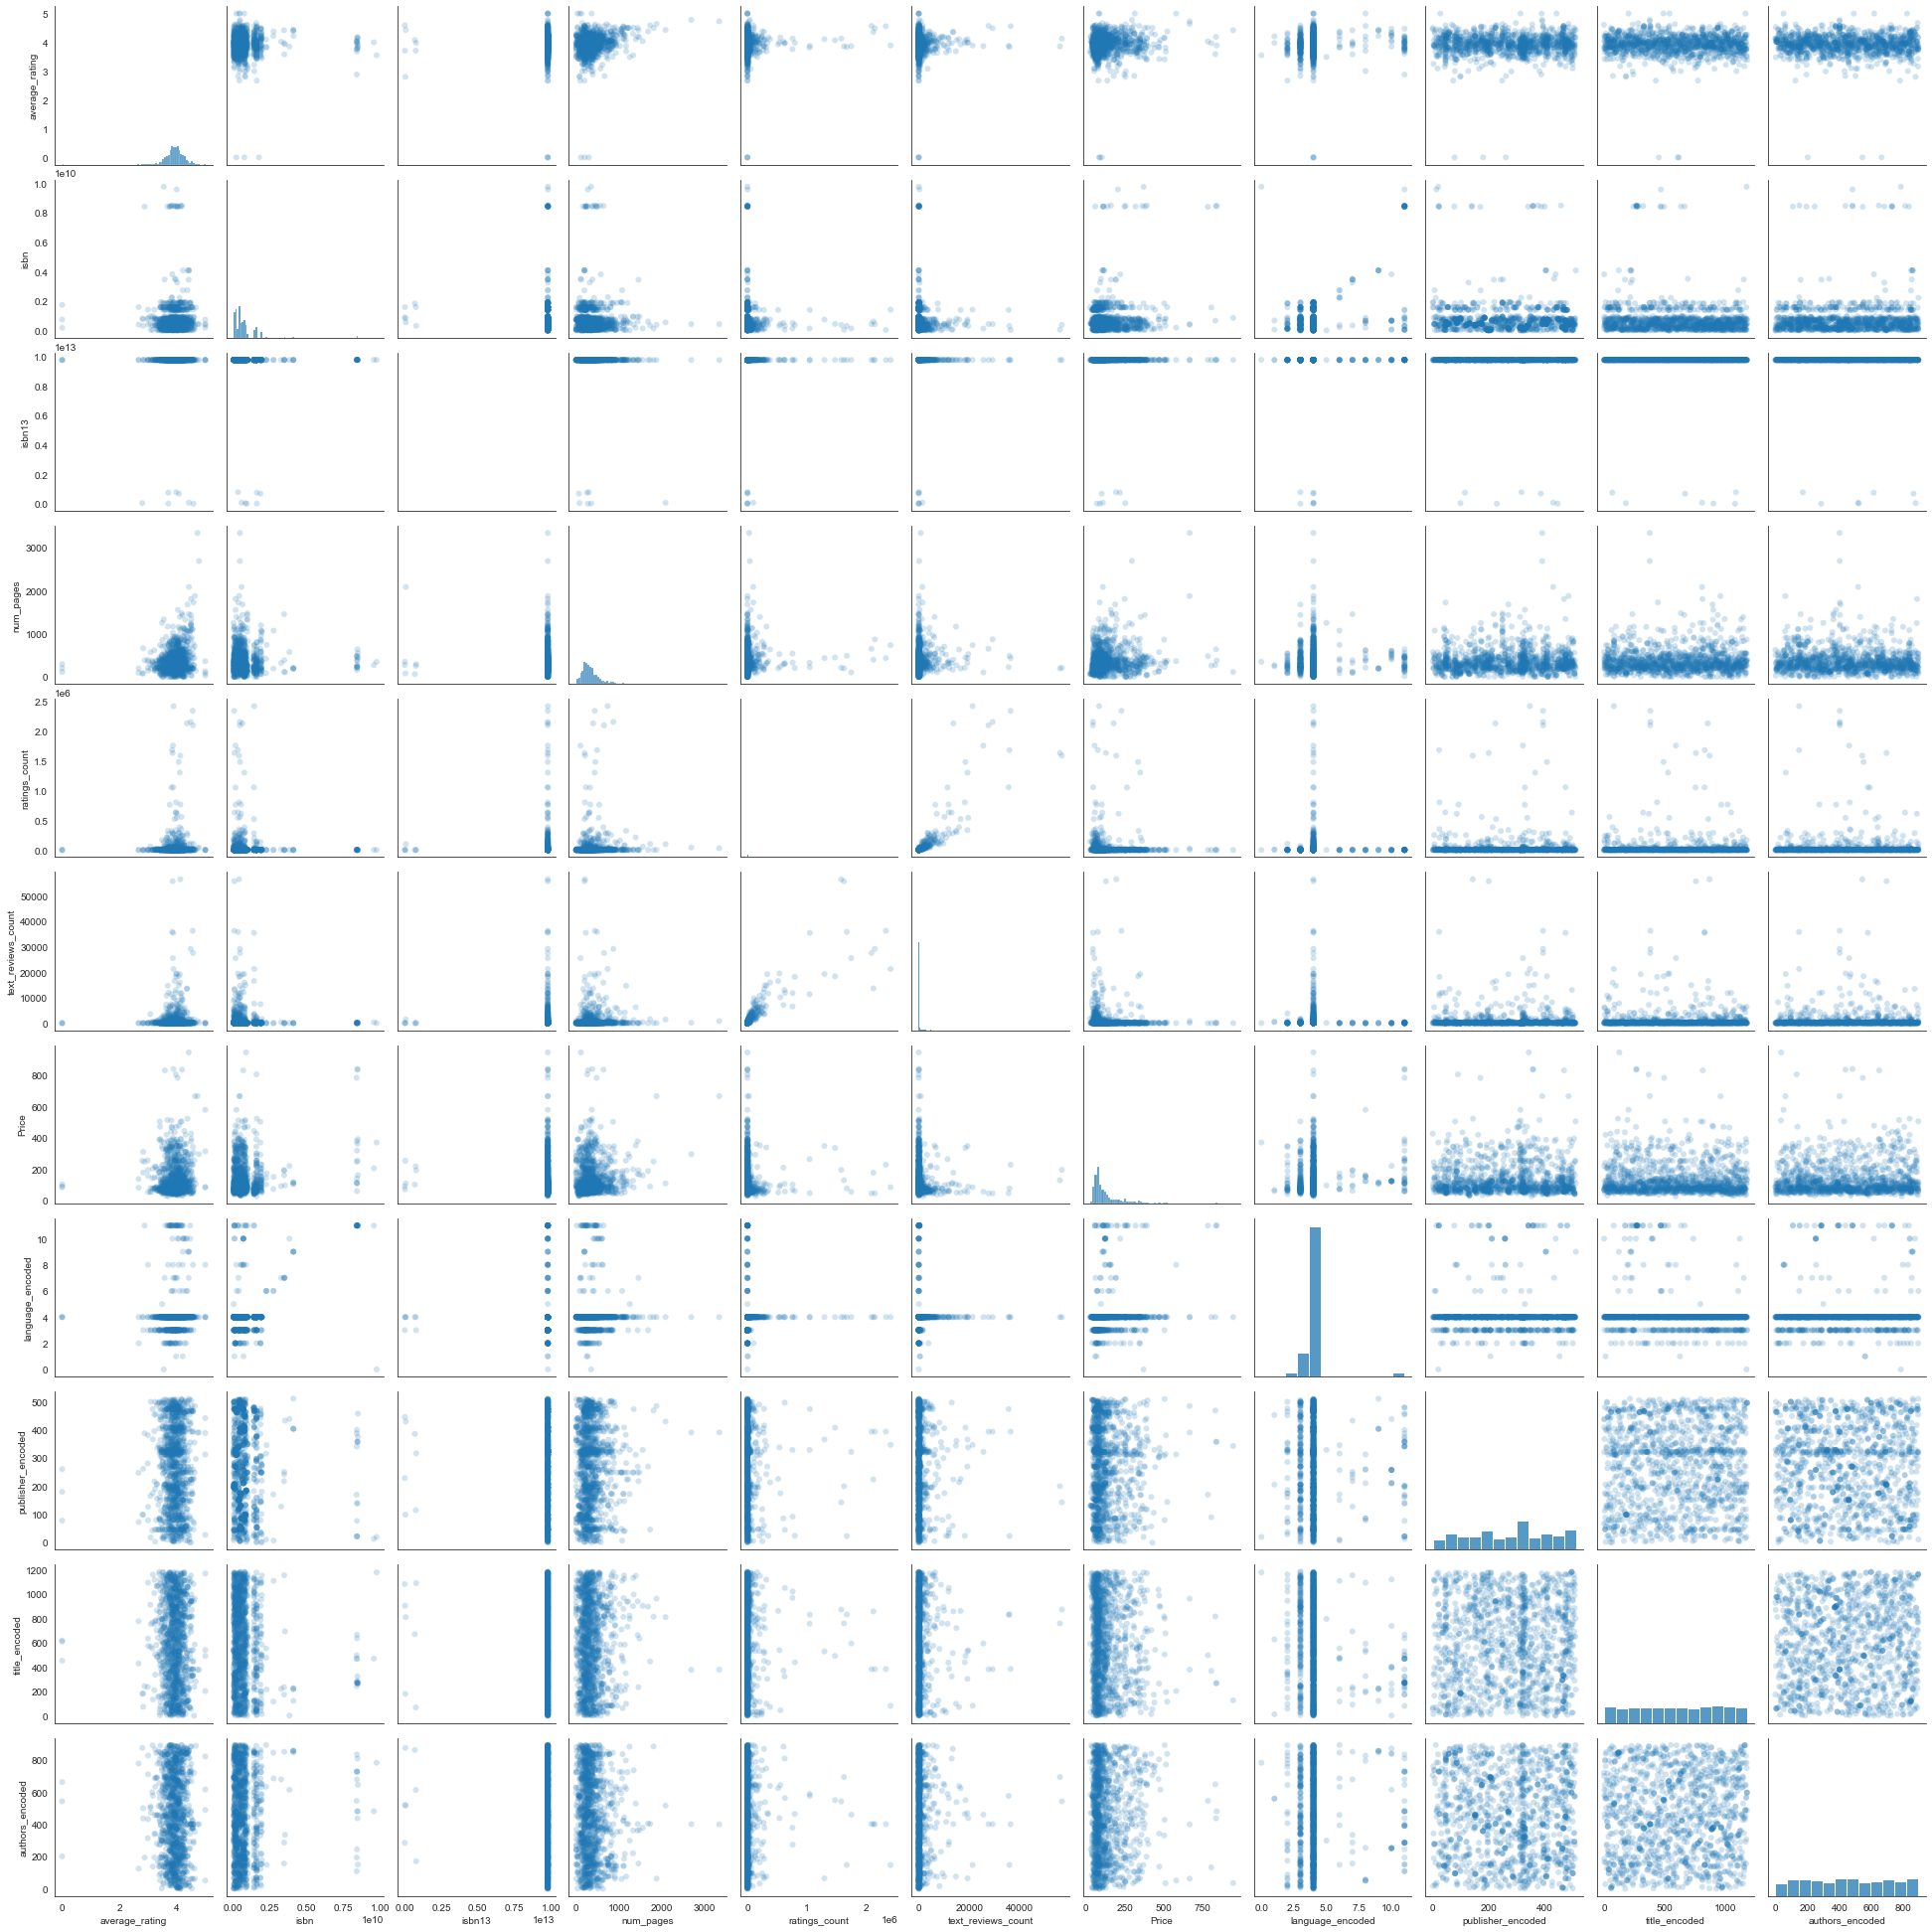

In [31]:
sns.pairplot(new_book_df, plot_kws=dict(alpha=.2, edgecolor='none'))

### 4. Building the Model

In [34]:
featurs = new_book_df.loc[:,['title_encoded', 'authors_encoded', 
                      'average_rating', 'isbn', 
                      'language_encoded', 'num_pages', 'ratings_count', 
                      'text_reviews_count', 'publisher_encoded']]

target = new_book_df['Price']

#### Splitting the data to Test (25%) and Train (75%) sets

In [35]:

X_train_val, X_test, y_train_val, y_test = train_test_split(featurs, target, test_size=0.25,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=42)

In [36]:
m = LinearRegression()
m.fit(X_train,y_train)

LinearRegression()

In [37]:
m.score(X_train,y_train)

0.07997872161426134

In [38]:
# Score on validation set
m.score(X_val,y_val)


0.02284870010551865

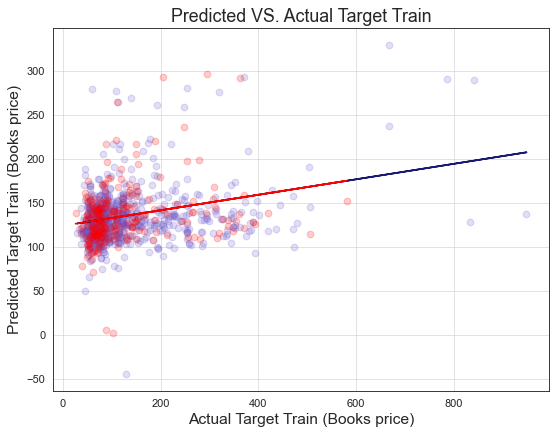

In [39]:
y_train_pred = m.predict(X_train)
y_val_pred = m.predict(X_val)

fig = plt.figure(figsize=(8, 6), dpi=80)
#figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred, alpha=0.2, color='slateblue')
plt.scatter(y_val, y_val_pred , alpha=0.2, color='red')

m, b = np.polyfit(y_train, y_train_pred, 1)
m, b = np.polyfit(y_val, y_val_pred, 1)

# m = slope 
# b = intercept


plt.plot(y_train, m*y_train + b, color='midnightblue')
plt.plot(y_val, m*y_val + b, color='red')


plt.xlabel('Actual Target Train (Books price)', fontsize=14)
plt.ylabel('Predicted Target Train (Books price)', fontsize=14)
plt.title('Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)

> as we can see from the figure above the model results with High Bais and Low variance which means that the model is underfits 

> sinc we don't neadidentefier information anymore we better get rid of bookID, title,authors, isbn, isbn13, language_code, publisher, language_encoded, publisher_encoded,and title_encoded  also we don't need publication_date column since our problemdoesn't depend on it so we get rid of it too

In [40]:
book_df=new_book_df.loc[:,['average_rating','num_pages','ratings_count','text_reviews_count','Price']]
book_df

,average_rating,num_pages,ratings_count,text_reviews_count,Price
bookID,,,,,
1,4.57,652,2095690,27591,44.887500
2,4.49,870,2153167,29221,44.887500
5,4.56,435,2339585,36325,228.225000
8,4.78,2690,41428,164,295.552326
9,3.74,152,19,1,79.612500
...,...,...,...,...,...
4685,3.67,288,6093,447,82.462500
4686,3.81,176,506,50,70.125000
4692,4.37,720,23114,1175,223.460000



#####  average_rating feature and ratings_count feature refere to the same pice of information though we will get rif of one of them to avoid redundency and coleanearty. since ratings_count feature has same scale as the other nemoric features we will keep it and drop average_rating column

In [41]:
book_df.drop(['average_rating'],axis='columns', inplace=True)

###  feature engenering

as part of feature engenering we need to conver featurs that have fine correlation with the target (Price) to  dummy Variables 

In [42]:
book_df['language_code'] = new_book_df['language_code']

In [43]:
pd.get_dummies(book_df['language_code'], drop_first=True).head(5)

,en-CA,en-GB,en-US,eng,enm,fre,ger,grc,jpn,mul,spa
bookID,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,0


In [44]:
book_df = pd.get_dummies(book_df, drop_first=True) #can just apply it to the whole df
book_df.head(3)

,num_pages,ratings_count,text_reviews_count,Price,language_code_en-CA,language_code_en-GB,language_code_en-US,language_code_eng,language_code_enm,language_code_fre,language_code_ger,language_code_grc,language_code_jpn,language_code_mul,language_code_spa
bookID,,,,,,,,,,,,,,,
1,652,2095690,27591,44.8875,0,0,0,1,0,0,0,0,0,0,0
2,870,2153167,29221,44.8875,0,0,0,1,0,0,0,0,0,0,0
5,435,2339585,36325,228.2250,0,0,0,1,0,0,0,0,0,0,0


In [45]:
book_df

,num_pages,ratings_count,text_reviews_count,Price,language_code_en-CA,language_code_en-GB,language_code_en-US,language_code_eng,language_code_enm,language_code_fre,language_code_ger,language_code_grc,language_code_jpn,language_code_mul,language_code_spa
bookID,,,,,,,,,,,,,,,
1,652,2095690,27591,44.887500,0,0,0,1,0,0,0,0,0,0,0
2,870,2153167,29221,44.887500,0,0,0,1,0,0,0,0,0,0,0
5,435,2339585,36325,228.225000,0,0,0,1,0,0,0,0,0,0,0
8,2690,41428,164,295.552326,0,0,0,1,0,0,0,0,0,0,0
9,152,19,1,79.612500,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,288,6093,447,82.462500,0,0,0,1,0,0,0,0,0,0,0
4686,176,506,50,70.125000,0,0,0,1,0,0,0,0,0,0,0
4692,720,23114,1175,223.460000,0,0,0,1,0,0,0,0,0,0,0


> After adding dummy vriables we will decleare Linear Regression ,Ridge Regression With Cross Validation, Polynomial Regression, and Lasso Regression With Cross Validation. 
>then Split the dataset into 3 parts 20% test set 25% validation set and 55% train set.
after that we will fitt the models to dicide whichone is more proper

## Split Data


In [46]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge ,RidgeCV


In [47]:
X, y = book_df.drop('Price',axis=1), book_df['Price']


In [48]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)
    

#### Regression Algorithms


In [49]:
def linear_Regression(X_train, y_train, X_val, y_val):
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    print(f"Training Score: {round(lm.score(X_train, y_train), 6)}")
    print(f"Validation Score: {round(lm.score(X_val, y_val), 6)}")
    return lm

In [50]:
def linear_Regression_kfold(X_train, y_train):
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
    #print Training score
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    print(f"Training Score: {round(lm.score(X_train, y_train), 6)}")

    #print Validation score
    valid_scores = cross_val_score(lm, X_train, y_train, cv=kf)
    print(f"Validation Mean Score: {round(np.mean(valid_scores), 6)}")
    return lm

In [51]:
def ridge_model(X_train,y_train, regular_var = 1, CV_flag = False, cv_value = 5, alphavec = [0.1,0.01, 0.001]):
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
    if CV_flag is True:
        m = RidgeCV(alphas = alphavec, cv = cv_value)
        m.fit(X_train, y_train)
    
        print("Best score:", m.best_score_)
    else:
        m = Ridge(alpha = regular_var) 
        m.fit(X_train, y_train )
        
        valid_scores = cross_val_score(m, X_train, y_train, cv=kf)
        print(f"Training Score: {round(m.score(X_train,y_train), 6)}")
        print(f"Validation Mean Score: {round(np.mean(valid_scores), 6)}")
    return m

In [52]:
def lasso_model(X_train,y_train, regular_var = 1, CV_flag = False, cv_value = 5, alphavec = [0.1,0.01, 0.001]):
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
    if CV_flag is True:
        m = LassoCV(alphas = alphavec, cv = cv_value)
        m.fit(X_train, y_train)
        print("mean error:", m.mse_path_)
    else:
        m = Lasso(alpha = regular_var) 
        m.fit(X_train, y_train )

    valid_scores = cross_val_score(m, X_train, y_train, cv=kf)
    print(f"Training Score: {round(m.score(X_train,y_train), 6)}")
    print(f"Validation Mean Score: {round(np.mean(valid_scores), 6)}")
    return m


### 1: Linear Regression


In [53]:
linear_Regression_model = linear_Regression(X_train, y_train, X_val, y_val)


Training Score: 0.044891
Validation Score: -0.032237


### 1.1: Linear Regression With Cross Validation

In [54]:
lg_model_cv = linear_Regression_kfold(X_train, y_train)


Training Score: 0.044891
Validation Mean Score: -0.00117


### 2: Ridge Regression

In [55]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

red_model = Ridge(alpha=1)

In [56]:
red_model.fit(X_train_scaled, y_train)

print(f'Ridge Regression val R^2: {red_model.score(X_val_scaled, y_val):.3f}')


Ridge Regression val R^2: -0.030


 ### 2.1: Ridge Regression With Cross Validation

In [57]:
red_model_cv = ridge_model(X_train, y_train)


Training Score: 0.044664
Validation Mean Score: -0.00066


### 3: Polynomial Regression (degree = 2)

In [58]:
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

poly_model = LinearRegression()

In [59]:
poly_model.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {poly_model.score(X_val_poly, y_val):.3f}')

Degree 2 polynomial regression val R^2: -0.194


### 4: Lasso Regression With Cross Validation

In [60]:
lasso_model_cv = lasso_model(X_train, y_train, CV_flag = True)


mean error: [[13411.31111816  8489.64783444 15954.20273409 10262.45467356
  16594.70160273]
 [13373.46264437  8521.32496662 15938.52959516 10258.0914744
  16694.08932761]
 [13375.05022637  8524.49444566 15936.53263207 10257.97298597
  16704.14837309]]
Training Score: 0.044267
Validation Mean Score: -0.000498


#####   linear  Regression

affter aplying simple and coros validation we compared the results and decide that linear Regression model is more proper than the other models
now we will try to improve our modle to avoid underfitting

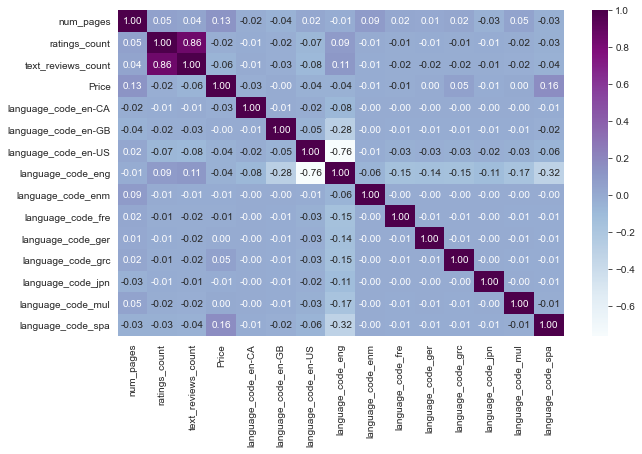

In [61]:
corr =book_df.corr()
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.savefig('./Cor')
plt.show()

In [62]:
df2=book_df.copy()
df2['num_pages_2']= df2['num_pages']**4

In [63]:
df2.drop(['num_pages'],axis='columns', inplace=True)

In [64]:
X, y = df2.drop('Price',axis=1),df2['Price']


In [65]:
X1, X_test1, y1, y_test1 = train_test_split(X, y, test_size=0.2)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1, test_size=0.25)
    

In [66]:
linear_Regression_model_one = linear_Regression(X_train1, y_train1, X_val1, y_val1)


Training Score: 0.030396
Validation Score: 0.012458


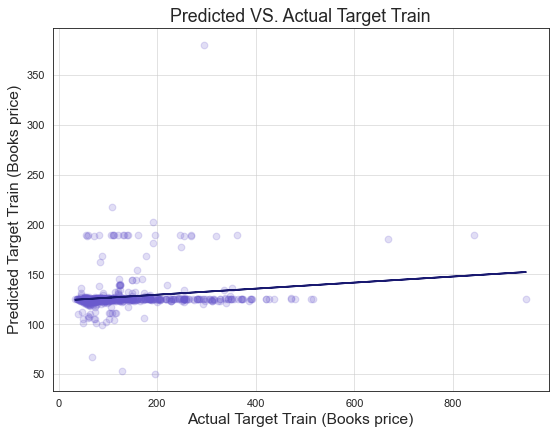

In [70]:
y_train_pred = linear_Regression_model_one.predict(X_train1)
fig = plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train1, y_train_pred, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train1, y_train_pred, 1)
# m = slope 
# b = intercept

plt.plot(y_train1, m*y_train1 + b, color='midnightblue')

plt.xlabel('Actual Target Train (Books price)', fontsize=14)
plt.ylabel('Predicted Target Train (Books price)', fontsize=14)
plt.title('Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)


In [71]:
y_pred =  linear_Regression_model_one.predict(X_test1)


In [72]:
print(r2_score(y_test1, y_pred))

0.11912202372137859


In [73]:
print(linear_Regression_model_one.coef_)
print(linear_Regression_model_one.intercept_)

[ 3.51548659e-05 -2.32014787e-03 -6.29227878e+01 -5.67901754e+00
 -7.55419163e+00 -5.97653850e+00  2.13162821e-14 -2.63881033e+01
  4.99307732e+01  1.33987681e+01 -2.03482813e+01  7.51138741e+00
  5.80279913e+01  4.84872458e-12]
131.3199547271709
